<a href="https://colab.research.google.com/github/skshrinithi11bio-hash/week5-customer-sales-analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

sales_path = "/content/drive/MyDrive/arena files/sales_data.csv"
churn_path = "/content/drive/MyDrive/arena files/customer_churn.csv"

sales_df = pd.read_csv(sales_path)
churn_df = pd.read_csv(churn_path)

sales_df.head(), churn_df.head()


(         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
 0  2024-01-01       Phone         7  37300     CUST001   East       261100
 1  2024-01-02  Headphones         4  15406     CUST002  North        61624
 2  2024-01-03       Phone         2  21746     CUST003   West        43492
 3  2024-01-04  Headphones         1  30895     CUST004   East        30895
 4  2024-01-05      Laptop         8  39835     CUST005  North       318680,
   CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
 0     C00001       6              64          1540        One year   
 1     C00002      21             113          1753  Month-to-month   
 2     C00003      27              31          1455        Two year   
 3     C00004      53              29          7150  Month-to-month   
 4     C00005      16             185          1023        One year   
 
       PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
 0       Credit Card               No              1 

In [3]:
# Handle missing values
sales_df.fillna(0, inplace=True)
churn_df.fillna(0, inplace=True)

# Convert date column if present
if "Order_Date" in sales_df.columns:
    sales_df["Order_Date"] = pd.to_datetime(sales_df["Order_Date"])


In [4]:
sales_df["Revenue"] = sales_df["Quantity"] * sales_df["Price"]
sales_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Revenue
0,2024-01-01,Phone,7,37300,CUST001,East,261100,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,318680


In [10]:
merged_df = pd.merge(
    sales_df,
    churn_df,
    left_on="Customer_ID",
    right_on="CustomerID",
    how="left"
)


In [11]:
# Total Revenue
total_revenue = merged_df["Revenue"].sum()

# Average Order Value
avg_order_value = merged_df["Revenue"].mean()

# Revenue by Churn Status
revenue_by_churn = merged_df.groupby("Churn")["Revenue"].sum()

print("CUSTOMER SALES ANALYSIS REPORT")
print("---------------------------------")
print(f"Total Revenue       : ₹{total_revenue:,.2f}")
print(f"Average Order Value : ₹{avg_order_value:,.2f}")
print("\nRevenue by Churn Status:")
print(revenue_by_churn)


CUSTOMER SALES ANALYSIS REPORT
---------------------------------
Total Revenue       : ₹12,365,048.00
Average Order Value : ₹123,650.48

Revenue by Churn Status:
Series([], Name: Revenue, dtype: int64)


In [13]:
pivot_table = pd.pivot_table(
    merged_df,
    values="Revenue",
    index="Region",
    columns="Churn",
    aggfunc="sum",
    fill_value=0
)

pivot_table


Churn
Region


Churn
Unknown    12365048
Name: Revenue, dtype: int64


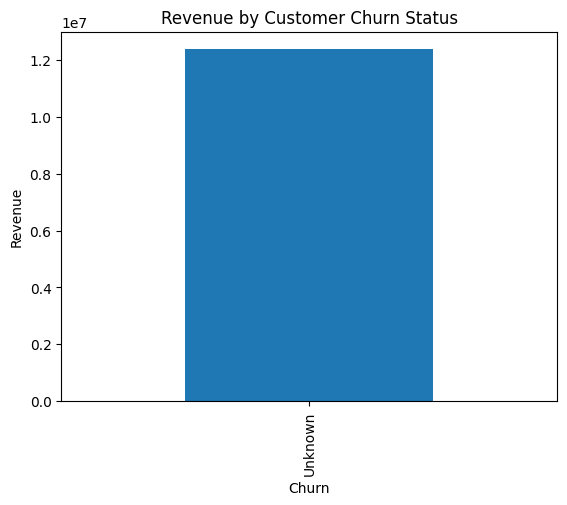

In [18]:
import matplotlib.pyplot as plt

# Fix churn column
merged_df["Churn"] = merged_df["Churn"].fillna("Unknown")

# Group again
revenue_by_churn = merged_df.groupby("Churn")["Revenue"].sum()

print(revenue_by_churn)

# Plot safely
if not revenue_by_churn.empty:
    revenue_by_churn.plot(kind="bar")
    plt.title("Revenue by Customer Churn Status")
    plt.ylabel("Revenue")
    plt.show()
else:
    print("No churn data available to plot.")


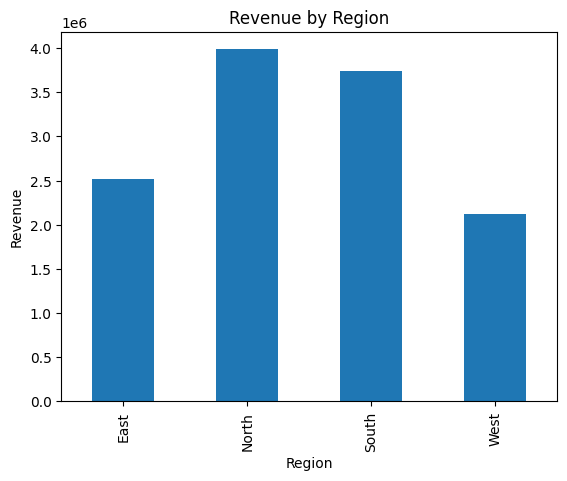

In [19]:
merged_df.groupby("Region")["Revenue"].sum().plot(kind="bar")
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.show()
